In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Wellbeing_and_lifestyle_data_Kaggle.csv')

Zbiór danych

In [3]:
df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [8]:
pd.set_option('display.max_columns', None)
df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE,MONTH
0,7/7/15,3,2,2,5,0,5,2,0,1,6,4,5,0,7,5,5,1,4,0,5,2,0,609.5,7
1,7/7/15,2,3,4,3,8,10,5,2,2,5,2,5,5,8,2,2,2,3,2,6,2,0,655.6,7
2,7/7/15,2,3,3,4,4,10,3,2,2,2,2,4,5,8,10,2,2,4,8,3,2,0,631.6,7
3,7/7/15,3,3,10,3,10,7,2,5,2,3,5,5,0,5,7,5,1,5,2,0,3,0,622.7,7
4,7/7/15,5,1,3,3,10,4,2,4,2,5,0,5,0,7,0,0,2,8,1,5,3,0,663.9,7


Etykiety danych

In [34]:
df['GENDER']

0        Female
1        Female
2        Female
3        Female
4        Female
          ...  
15966    Female
15967    Female
15968      Male
15969    Female
15970    Female
Name: GENDER, Length: 15971, dtype: object

In [5]:
dfetykiety = pd.read_excel('etykiety.xlsx')

In [35]:
dfetykiety.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,Date when survey was completed,HOW MANY FRUITS OR VEGETABLES DO YOU EAT EVERY...,HOW MUCH STRESS DO YOU TYPICALLY EXPERIENCE EV...,HOW MANY NEW PLACES DO YOU VISIT?,HOW MANY PEOPLE ARE VERY CLOSE TO YOU?,HOW MANY PEOPLE DO YOU HELP ACHIEVE A BETTER L...,WITH HOW MANY PEOPLE DO YOU INTERACT WITH DURI...,HOW MANY REMARKABLE ACHIEVEMENTS ARE YOU PROUD...,HOW MANY TIMES DO YOU DONATE YOUR TIME OR MONE...,WHAT IS YOUR BODY MASS INDEX (BMI) RANGE?,...,ABOUT HOW LONG DO YOU TYPICALLY SLEEP?,HOW MANY DAYS OF VACATION DO YOU TYPICALLY LOS...,HOW OFTEN DO YOU SHOUT OR SULK AT SOMEBODY?,HOW SUFFICIENT IS YOUR INCOME TO COVER BASIC L...,HOW MANY RECOGNITIONS HAVE YOU RECEIVED IN YOU...,HOW MANY HOURS DO YOU SPEND EVERYDAY DOING WHA...,"IN A TYPICAL WEEK, HOW MANY TIMES DO YOU HAVE ...",AGE GROUPS,MALE OR FEMALE,WORK LIFE BALANCE


In [7]:
dfetykiety.to_numpy()

array([['Date when survey was completed',
        'HOW MANY FRUITS OR VEGETABLES DO YOU EAT EVERYDAY?',
        'HOW MUCH STRESS DO YOU TYPICALLY EXPERIENCE EVERYDAY?',
        'HOW MANY NEW PLACES DO YOU VISIT?',
        'HOW MANY PEOPLE ARE VERY CLOSE TO YOU?',
        'HOW MANY PEOPLE DO YOU HELP ACHIEVE A BETTER LIFE?',
        'WITH HOW MANY PEOPLE DO YOU INTERACT WITH DURING A TYPICAL DAY?',
        'HOW MANY REMARKABLE ACHIEVEMENTS ARE YOU PROUD OF?',
        'HOW MANY TIMES DO YOU DONATE YOUR TIME OR MONEY TO GOOD CAUSES?',
        'WHAT IS YOUR BODY MASS INDEX (BMI) RANGE?',
        'HOW WELL DO YOU COMPLETE YOUR WEEKLY TO-DO LISTS?',
        'IN A TYPICAL DAY, HOW MANY HOURS DO YOU EXPERIENCE "FLOW"?',
        'HOW MANY STEPS (IN THOUSANDS) DO YOU TYPICALLY WALK EVERYDAY?',
        'FOR HOW MANY YEARS AHEAD IS YOUR LIFE VISION VERY CLEAR FOR?',
        'ABOUT HOW LONG DO YOU TYPICALLY SLEEP?',
        'HOW MANY DAYS OF VACATION DO YOU TYPICALLY LOSE EVERY YEAR?',
        'HOW

In [8]:
df.shape

(15971, 24)

Jakiego typu zmienne występują w zbiorze?

In [9]:
df.dtypes

Timestamp                   object
FRUITS_VEGGIES               int64
DAILY_STRESS                 int64
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
AGE                         object
GENDER                      object
WORK_LIFE_BALANCE_SCORE    float64
dtype: object

Wartości puste, typy danych

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15971 entries, 0 to 15970
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15971 non-null  object 
 1   FRUITS_VEGGIES           15971 non-null  int64  
 2   DAILY_STRESS             15971 non-null  int64  
 3   PLACES_VISITED           15971 non-null  int64  
 4   CORE_CIRCLE              15971 non-null  int64  
 5   SUPPORTING_OTHERS        15971 non-null  int64  
 6   SOCIAL_NETWORK           15971 non-null  int64  
 7   ACHIEVEMENT              15971 non-null  int64  
 8   DONATION                 15971 non-null  int64  
 9   BMI_RANGE                15971 non-null  int64  
 10  TODO_COMPLETED           15971 non-null  int64  
 11  FLOW                     15971 non-null  int64  
 12  DAILY_STEPS              15971 non-null  int64  
 13  LIVE_VISION              15971 non-null  int64  
 14  SLEEP_HOURS           

Suma wystąpień wartości pustych

In [11]:
df.isnull().sum()

Timestamp                  0
FRUITS_VEGGIES             0
DAILY_STRESS               0
PLACES_VISITED             0
CORE_CIRCLE                0
SUPPORTING_OTHERS          0
SOCIAL_NETWORK             0
ACHIEVEMENT                0
DONATION                   0
BMI_RANGE                  0
TODO_COMPLETED             0
FLOW                       0
DAILY_STEPS                0
LIVE_VISION                0
SLEEP_HOURS                0
LOST_VACATION              0
DAILY_SHOUTING             0
SUFFICIENT_INCOME          0
PERSONAL_AWARDS            0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64

Podsumowanie zmiennych:
- count: zliczenie wartości w kolumnie
- mean: średnia
- std: odchylenie standardowe
- min: wartość minimalna
- 25%: I kwartyl
- 50%: II kwartyl
- 75%: III kwartyl
- max: wartość maksymalna

In [12]:
df.describe()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
count,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,...,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000
mean,2.922672,2.791685,5.233235,5.508296,5.616179,6.474047,4.000689,2.715171,1.410619,5.745977,...,5.703588,3.752176,7.042953,2.898441,2.931000,1.728946,5.711289,3.326279,6.233611,666.750510
std,1.442739,1.367801,3.311847,2.840287,3.241937,3.086643,2.755912,1.851556,0.491962,2.624179,...,2.891102,3.231083,1.199053,3.691867,2.676341,0.444518,3.089540,2.729128,3.016479,45.021103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,480.000000
25%,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,...,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,636.000000
50%,3.000000,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,...,5.000000,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,7.000000,667.700000
75%,4.000000,4.000000,8.000000,8.000000,9.500000,10.000000,6.000000,5.000000,2.000000,8.000000,...,8.000000,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,698.500000
max,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000


In [4]:
df['AGE']=df['AGE'].replace('Less than 20', '20 or less')

In [5]:
dfcopy = df.copy()

In [6]:
df['MONTH'] = pd.DatetimeIndex(df['Timestamp']).month
df['MONTH']

0        7
1        7
2        7
3        7
4        7
        ..
15966    3
15967    3
15968    3
15969    3
15970    3
Name: MONTH, Length: 15971, dtype: int64

In [7]:
df['GENDER'] = df['GENDER'].map( {'Female': 0, 'Male': 1} ).astype(int)
df['AGE'] = df['AGE'].map( {'20 or less': 0, '21 to 35': 1, '36 to 50': 2, '51 or more': 3} ).astype(int)

<AxesSubplot:title={'center':'Współczynniki korelacji liniowej Pearsona'}>

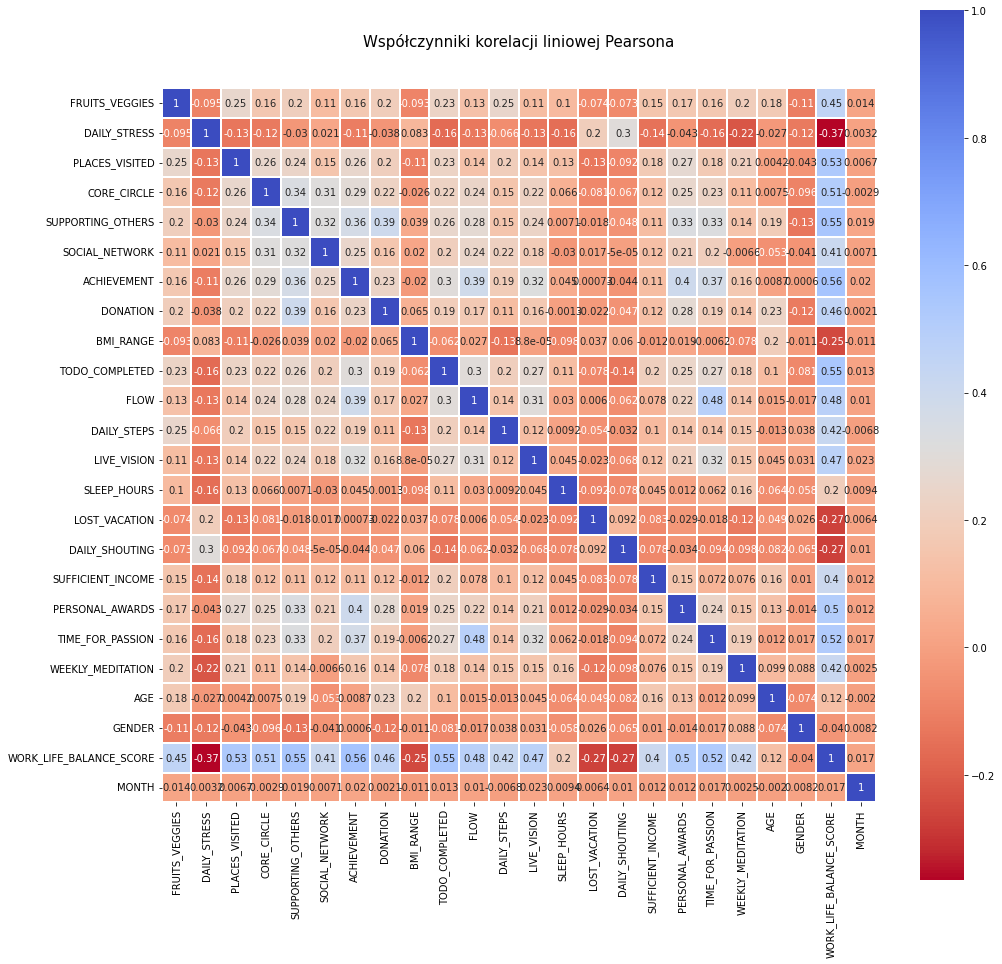

In [17]:
plt.figure(figsize=(16,16))
plt.title('Współczynniki korelacji liniowej Pearsona', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap='coolwarm_r', linecolor='white', annot=True)

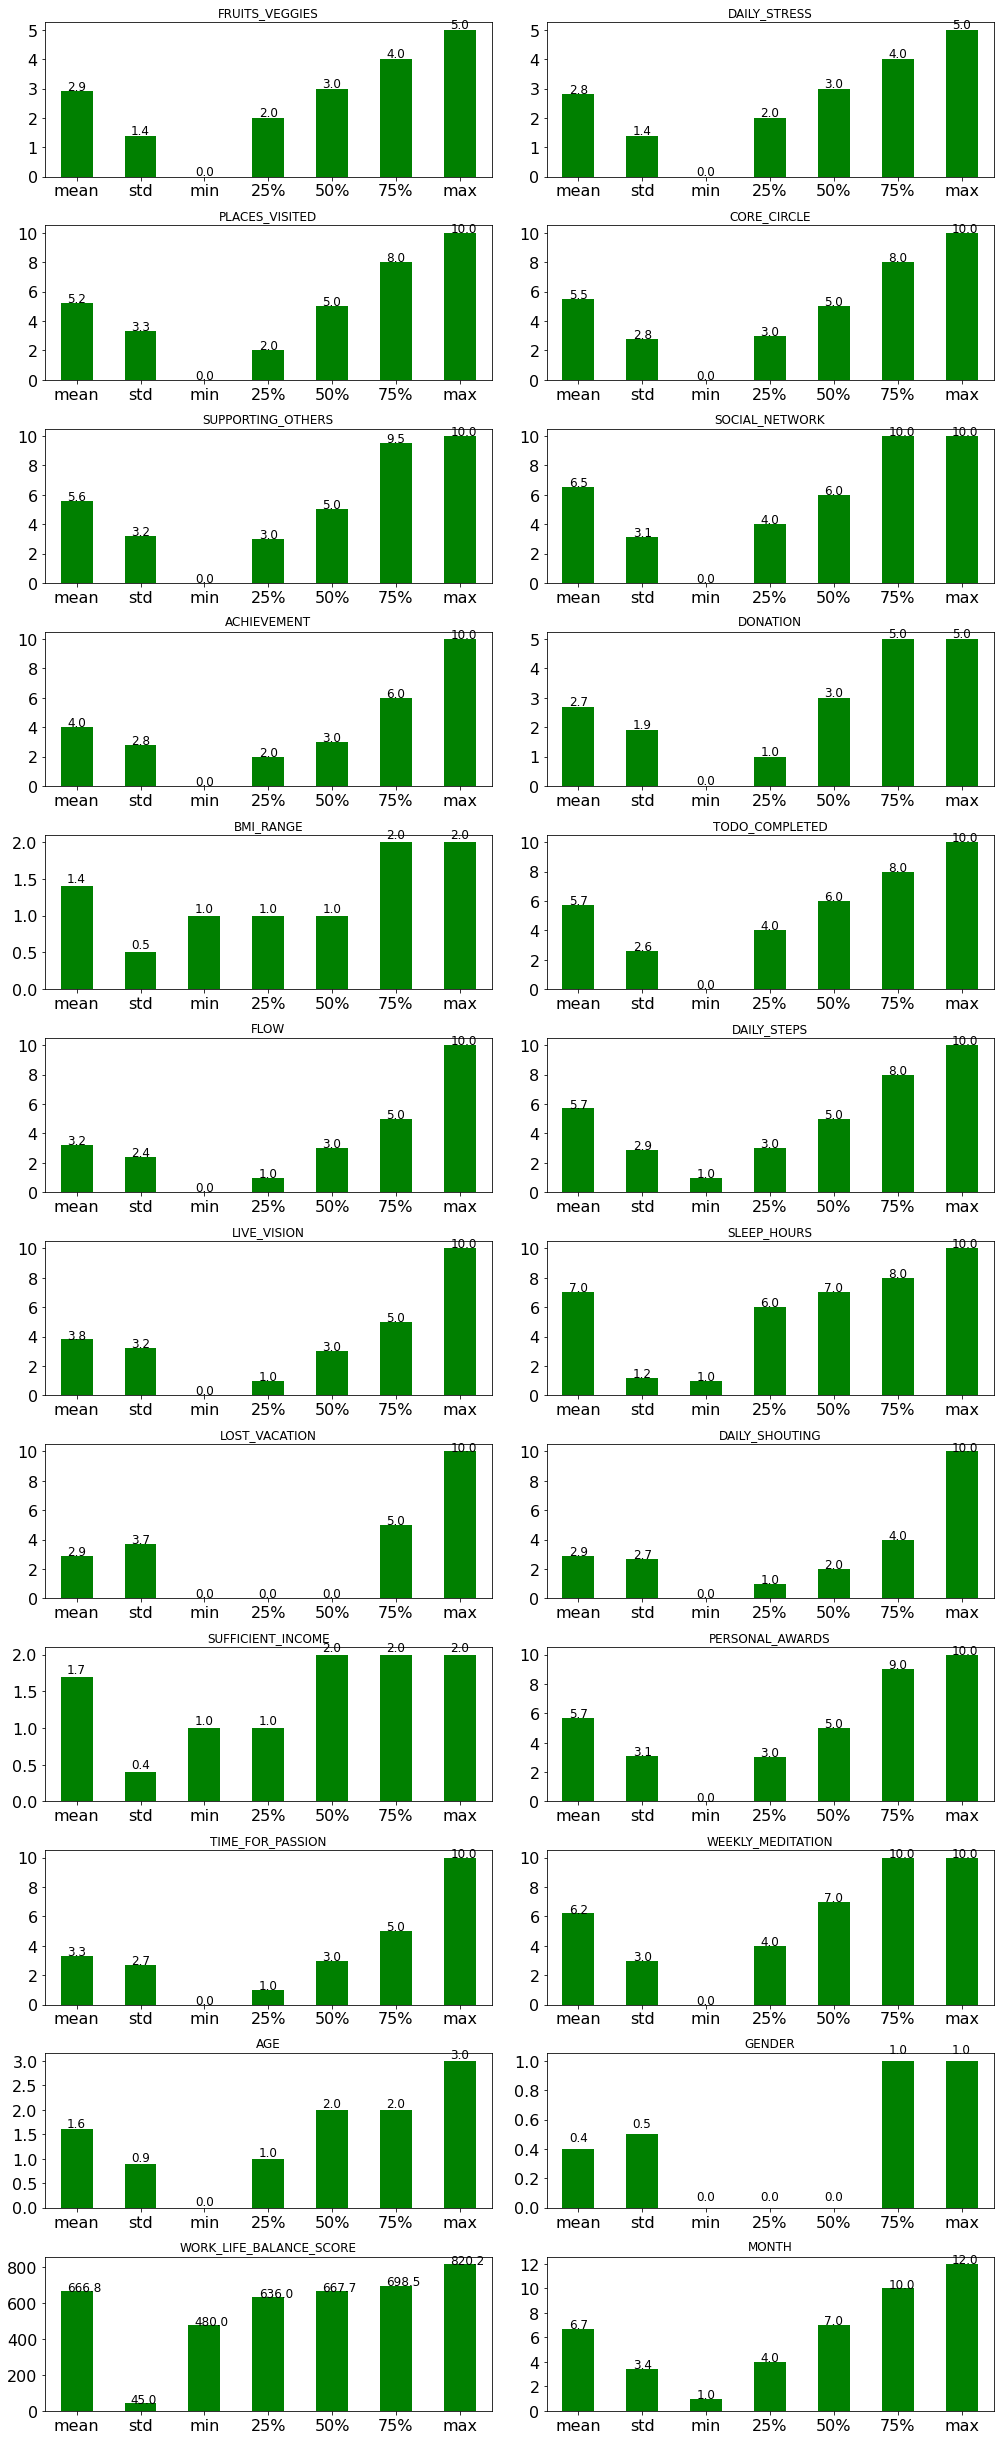

In [18]:
def descriptive(df):
    desc=df.describe().round(1).drop({'count'}, axis=0)
    i=-0.1
    j=0
    Row = int(round(len(desc.columns.tolist())/2+0.1)) 
    f,ax = plt.subplots(Row,2, figsize=(28,18))
    for name in desc.columns.tolist():
        desc[name].plot(title = name, kind='bar', figsize=(14,34), ax=ax[round(i), j], fontsize=16, color='green')
        ax[round(i), j].tick_params(axis='x', rotation=0)
        for k, v in enumerate(desc[name].tolist()):
            ax[round(i), j].text(k -0.15 , v +0.05, str(v), color='black', size = 12) #v to x, k to y
        i +=0.5 
        if j==0: j=1 
        else: j=0
    f.tight_layout()
descriptive(df)

In [19]:
df1 = dfcopy.pivot_table(values='WORK_LIFE_BALANCE_SCORE', index=['AGE'], columns=['GENDER'])
df1.head()

GENDER,Female,Male
AGE,,
20 or less,664.009577,664.251724
21 to 35,662.017509,659.763445
36 to 50,669.008342,664.180224
51 or more,678.510127,676.048863


In [20]:
result = df[df['BMI_RANGE']==1]
result

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE,MONTH
0,7/7/15,3,2,2,5,0,5,2,0,1,...,5,5,1,4,0,5,2,0,609.5,7
5,7/8/15,3,2,3,9,10,10,2,3,1,...,0,2,2,10,8,3,3,0,722.3,7
7,7/9/15,3,4,5,3,5,7,4,0,1,...,0,2,2,8,2,2,1,0,676.2,7
8,7/9/15,5,3,6,4,3,3,5,4,1,...,0,2,2,10,3,10,1,0,702.8,7
11,7/12/15,1,4,3,8,0,2,1,0,1,...,7,1,2,4,1,7,1,1,618.6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15962,3/13/21 13:27,2,3,2,5,10,8,6,5,1,...,5,5,2,5,5,5,1,0,685.6,3
15964,3/14/21 1:42,5,4,2,4,8,2,2,0,1,...,2,1,1,1,0,2,1,0,620.1,3
15967,3/14/21 6:30,3,3,6,8,7,4,6,3,1,...,0,0,2,10,5,8,1,0,714.9,3
15968,3/14/21 8:35,4,3,0,10,10,8,6,5,1,...,0,1,2,10,1,10,1,1,716.6,3


In [21]:
wlb = result['WORK_LIFE_BALANCE_SCORE']
wlb

0        609.5
5        722.3
7        676.2
8        702.8
11       618.6
         ...  
15962    685.6
15964    620.1
15967    714.9
15968    716.6
15969    682.0
Name: WORK_LIFE_BALANCE_SCORE, Length: 9413, dtype: float64

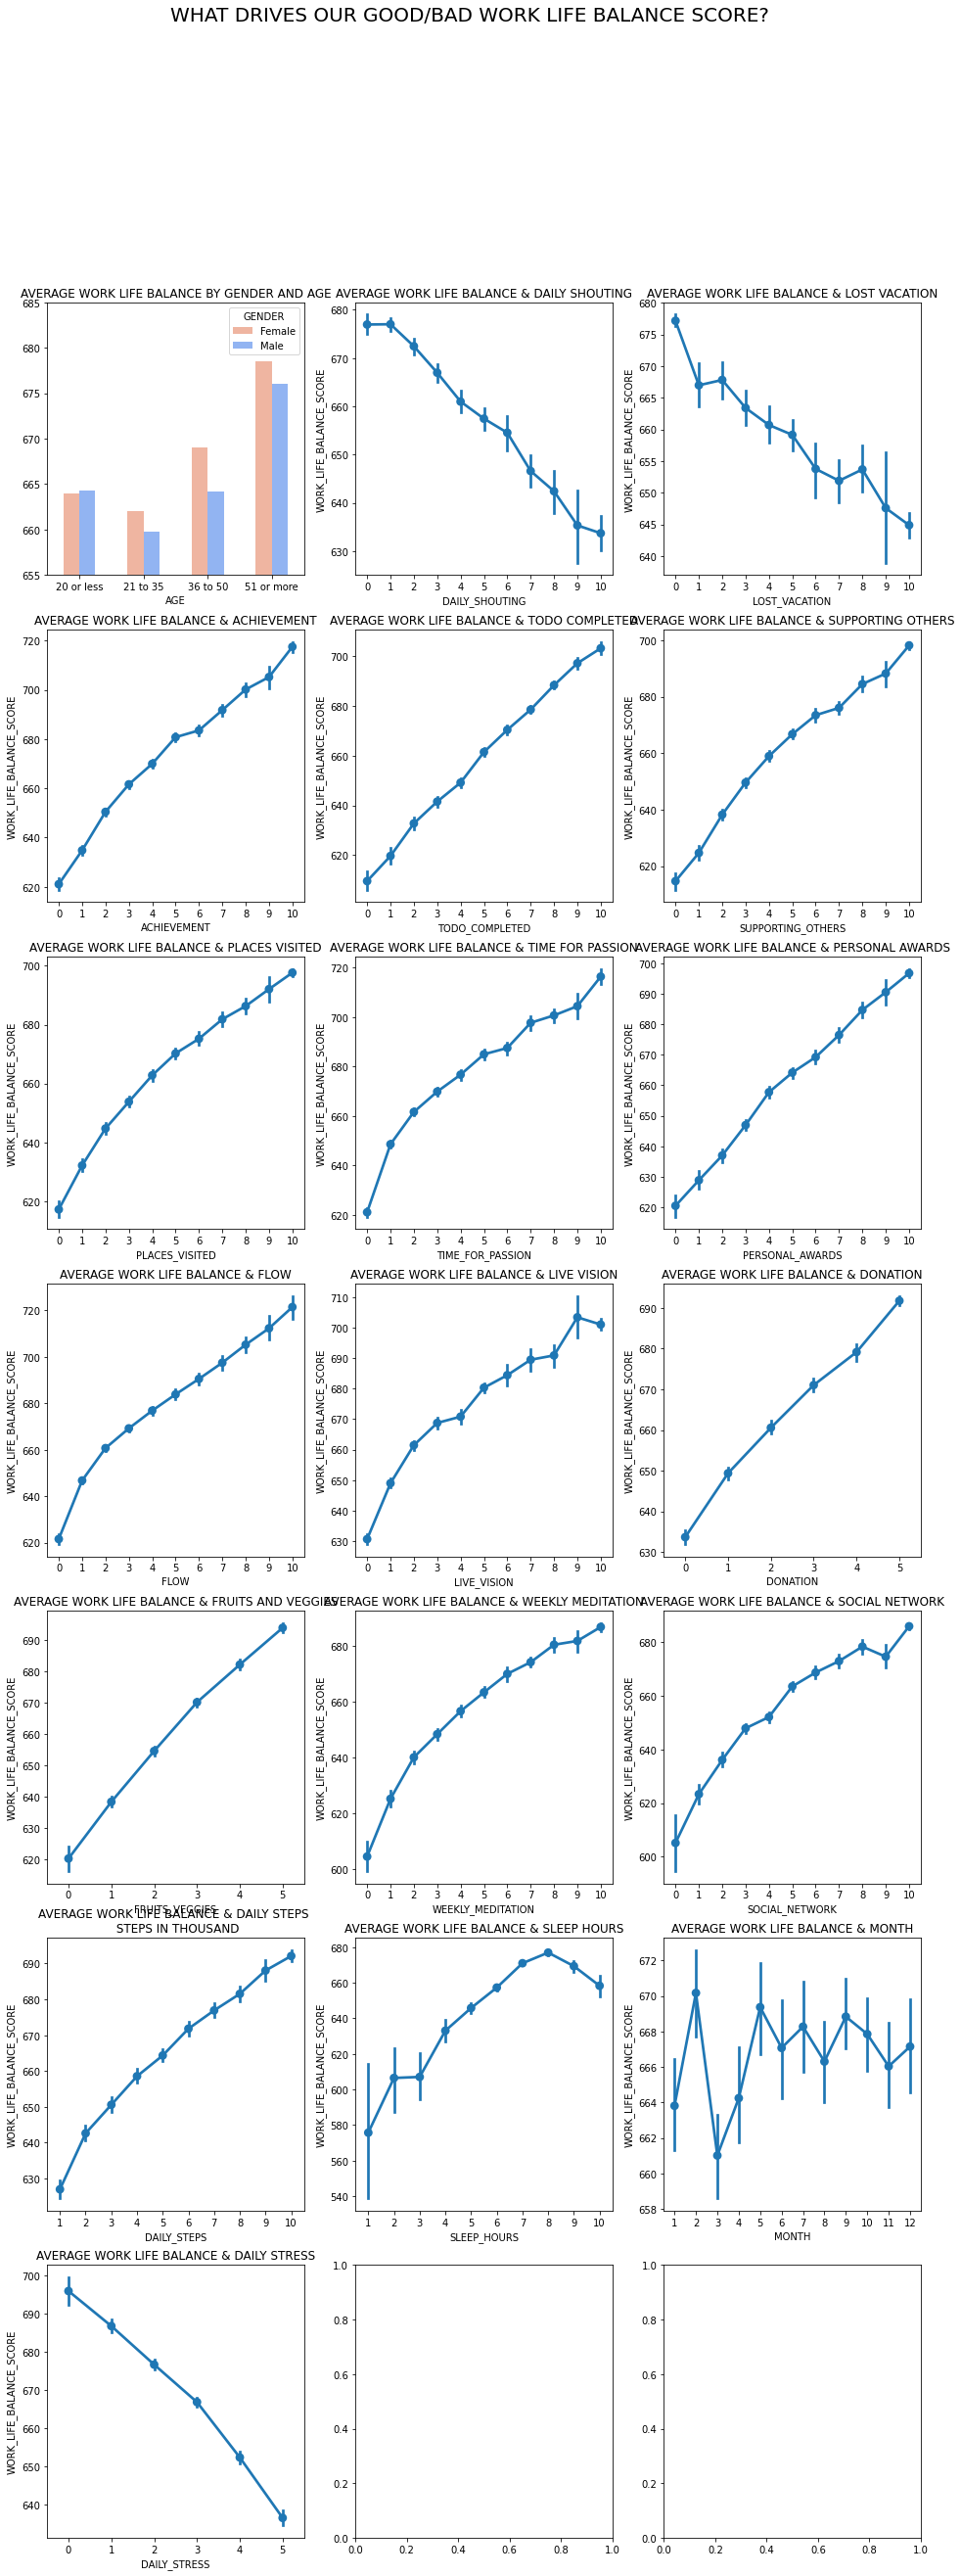

In [24]:
f,ax = plt.subplots(7,3,figsize=(16,42))
f.suptitle('WHAT DRIVES OUR GOOD/BAD WORK LIFE BALANCE SCORE?', fontsize=20)

ax[0,0].set_title('AVERAGE WORK LIFE BALANCE BY GENDER AND AGE')
ax[0,1].set_title('AVERAGE WORK LIFE BALANCE & DAILY SHOUTING')
ax[0,2].set_title('AVERAGE WORK LIFE BALANCE & LOST VACATION')
ax[1,0].set_title('AVERAGE WORK LIFE BALANCE & ACHIEVEMENT')
ax[1,1].set_title('AVERAGE WORK LIFE BALANCE & TODO COMPLETED')
ax[1,2].set_title('AVERAGE WORK LIFE BALANCE & SUPPORTING OTHERS')
ax[2,0].set_title('AVERAGE WORK LIFE BALANCE & PLACES VISITED')
ax[2,1].set_title('AVERAGE WORK LIFE BALANCE & TIME FOR PASSION')
ax[2,2].set_title('AVERAGE WORK LIFE BALANCE & PERSONAL AWARDS')
ax[3,0].set_title('AVERAGE WORK LIFE BALANCE & FLOW')
ax[3,1].set_title('AVERAGE WORK LIFE BALANCE & LIVE VISION')
ax[3,2].set_title('AVERAGE WORK LIFE BALANCE & DONATION')
ax[4,0].set_title('AVERAGE WORK LIFE BALANCE & FRUITS AND VEGGIES')
ax[4,1].set_title('AVERAGE WORK LIFE BALANCE & WEEKLY MEDITATION')
ax[4,2].set_title('AVERAGE WORK LIFE BALANCE & SOCIAL NETWORK')
ax[5,0].set_title('AVERAGE WORK LIFE BALANCE & DAILY STEPS \n STEPS IN THOUSAND')
ax[5,1].set_title('AVERAGE WORK LIFE BALANCE & SLEEP HOURS')
ax[5,2].set_title('AVERAGE WORK LIFE BALANCE & MONTH')
ax[6,0].set_title('AVERAGE WORK LIFE BALANCE & DAILY STRESS')

ax[0,0].set_ylim([655, 685])
df1.plot(kind='bar', color=('darksalmon', 'cornflowerblue'), alpha=0.7, ax = ax[0,0])
ax[0,0].tick_params(axis='x', rotation=0)

sns.pointplot(x = 'DAILY_SHOUTING', y = 'WORK_LIFE_BALANCE_SCORE', data = df, ax = ax[0,1])
sns.pointplot(x = 'LOST_VACATION', y = 'WORK_LIFE_BALANCE_SCORE', data = df, ax = ax[0,2])
sns.pointplot(x = 'ACHIEVEMENT',  y = 'WORK_LIFE_BALANCE_SCORE', data=df, ax = ax[1,0])
sns.pointplot(x= 'TODO_COMPLETED',y='WORK_LIFE_BALANCE_SCORE', data=df, ax = ax[1,1])
sns.pointplot(x = 'SUPPORTING_OTHERS',  y = 'WORK_LIFE_BALANCE_SCORE', data=df, ax = ax[1,2])
sns.pointplot(x = 'PLACES_VISITED',  y = 'WORK_LIFE_BALANCE_SCORE', data=df, ax = ax[2,0])
sns.pointplot(x= 'TIME_FOR_PASSION',y='WORK_LIFE_BALANCE_SCORE', data=df, ax = ax[2,1])
sns.pointplot(x = 'PERSONAL_AWARDS',  y = 'WORK_LIFE_BALANCE_SCORE', data=df, ax = ax[2,2])
sns.pointplot(x = 'FLOW',  y = 'WORK_LIFE_BALANCE_SCORE', data=df, ax = ax[3,0])
sns.pointplot(x= 'LIVE_VISION',y='WORK_LIFE_BALANCE_SCORE', data=df, ax = ax[3,1])
sns.pointplot(x = 'DONATION',  y = 'WORK_LIFE_BALANCE_SCORE', data=df, ax = ax[3,2])
sns.pointplot(x = 'FRUITS_VEGGIES',  y = 'WORK_LIFE_BALANCE_SCORE', data=df, ax = ax[4,0])
sns.pointplot(x= 'WEEKLY_MEDITATION',y='WORK_LIFE_BALANCE_SCORE', data=df, ax = ax[4,1])
sns.pointplot(x = 'SOCIAL_NETWORK',  y = 'WORK_LIFE_BALANCE_SCORE', data=df, ax = ax[4,2])
sns.pointplot(x = 'DAILY_STEPS',  y = 'WORK_LIFE_BALANCE_SCORE', data=df, ax = ax[5,0])
sns.pointplot(x= 'SLEEP_HOURS',y='WORK_LIFE_BALANCE_SCORE', data=df, ax = ax[5,1])
sns.pointplot(x = 'MONTH',  y = 'WORK_LIFE_BALANCE_SCORE', data=df, ax = ax[5,2])
sns.pointplot(x = 'DAILY_STRESS',  y = 'WORK_LIFE_BALANCE_SCORE', data=df, ax = ax[6,0])

plt.show()

In [25]:
df2 = dfcopy.pivot_table(values='ACHIEVEMENT', index=['AGE'], columns=['GENDER'], )
df2.head()

GENDER,Female,Male
AGE,,
20 or less,4.352113,4.086207
21 to 35,3.887602,3.780592
36 to 50,3.996285,4.156434
51 or more,4.012222,4.227480


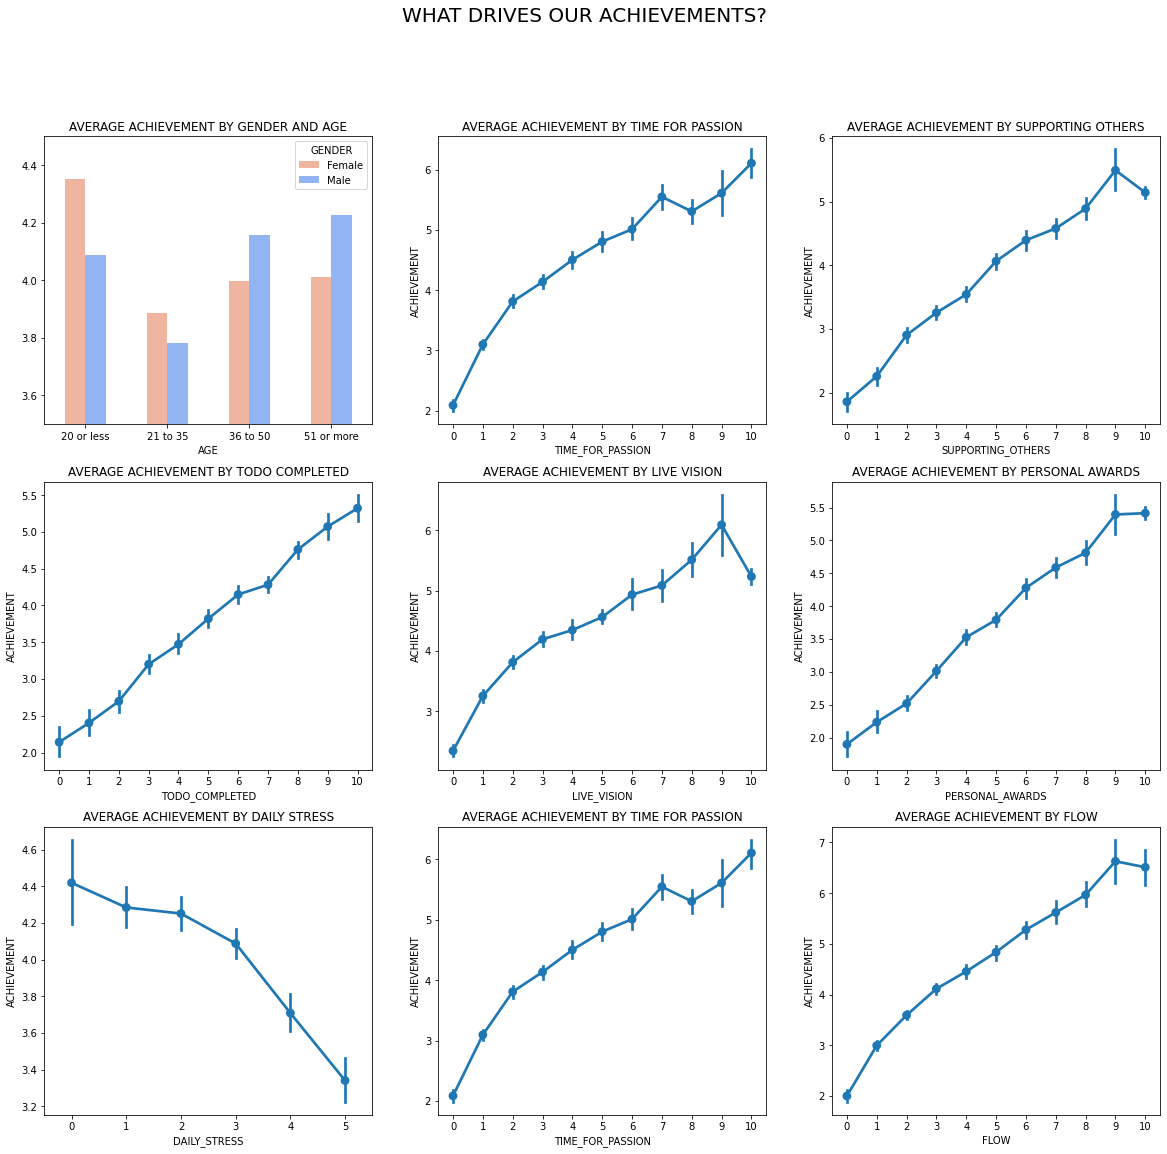

In [26]:
f,ax = plt.subplots(3,3,figsize=(20,18))
f.suptitle('WHAT DRIVES OUR ACHIEVEMENTS?', fontsize=20)

ax[0,0].set_title('AVERAGE ACHIEVEMENT BY GENDER AND AGE')
ax[0,1].set_title('AVERAGE ACHIEVEMENT BY TIME FOR PASSION')
ax[0,2].set_title('AVERAGE ACHIEVEMENT BY SUPPORTING OTHERS')
ax[1,0].set_title('AVERAGE ACHIEVEMENT BY TODO COMPLETED')
ax[1,1].set_title('AVERAGE ACHIEVEMENT BY LIVE VISION')
ax[1,2].set_title('AVERAGE ACHIEVEMENT BY PERSONAL AWARDS')
ax[2,0].set_title('AVERAGE ACHIEVEMENT BY DAILY STRESS')
ax[2,1].set_title('AVERAGE ACHIEVEMENT BY TIME FOR PASSION')
ax[2,2].set_title('AVERAGE ACHIEVEMENT BY FLOW')

ax[0,0].set_ylim([3.5, 4.5])
df2.plot(kind='bar', color=('darksalmon', 'cornflowerblue'), alpha=0.7, ax = ax[0,0])
ax[0,0].tick_params(axis='x', rotation=0)

sns.pointplot(x= 'TIME_FOR_PASSION',y='ACHIEVEMENT', data=df, ax = ax[0,1])
sns.pointplot(x = 'SUPPORTING_OTHERS', y = 'ACHIEVEMENT', data = df, ax = ax[0,2])
sns.pointplot(x = 'TODO_COMPLETED',  y = 'ACHIEVEMENT',    data=df, ax = ax[1,0])
sns.pointplot(x = 'LIVE_VISION',  y = 'ACHIEVEMENT',    data=df, ax = ax[1,1])
sns.pointplot(x = 'PERSONAL_AWARDS',  y = 'ACHIEVEMENT',    data=df, ax = ax[1,2])
sns.pointplot(x = 'DAILY_STRESS',  y = 'ACHIEVEMENT',    data=df, ax = ax[2,0])
sns.pointplot(x = 'TIME_FOR_PASSION',  y = 'ACHIEVEMENT',    data=df, ax = ax[2,1])
sns.pointplot(x = 'FLOW',  y = 'ACHIEVEMENT',    data=df, ax = ax[2,2])

plt.show()

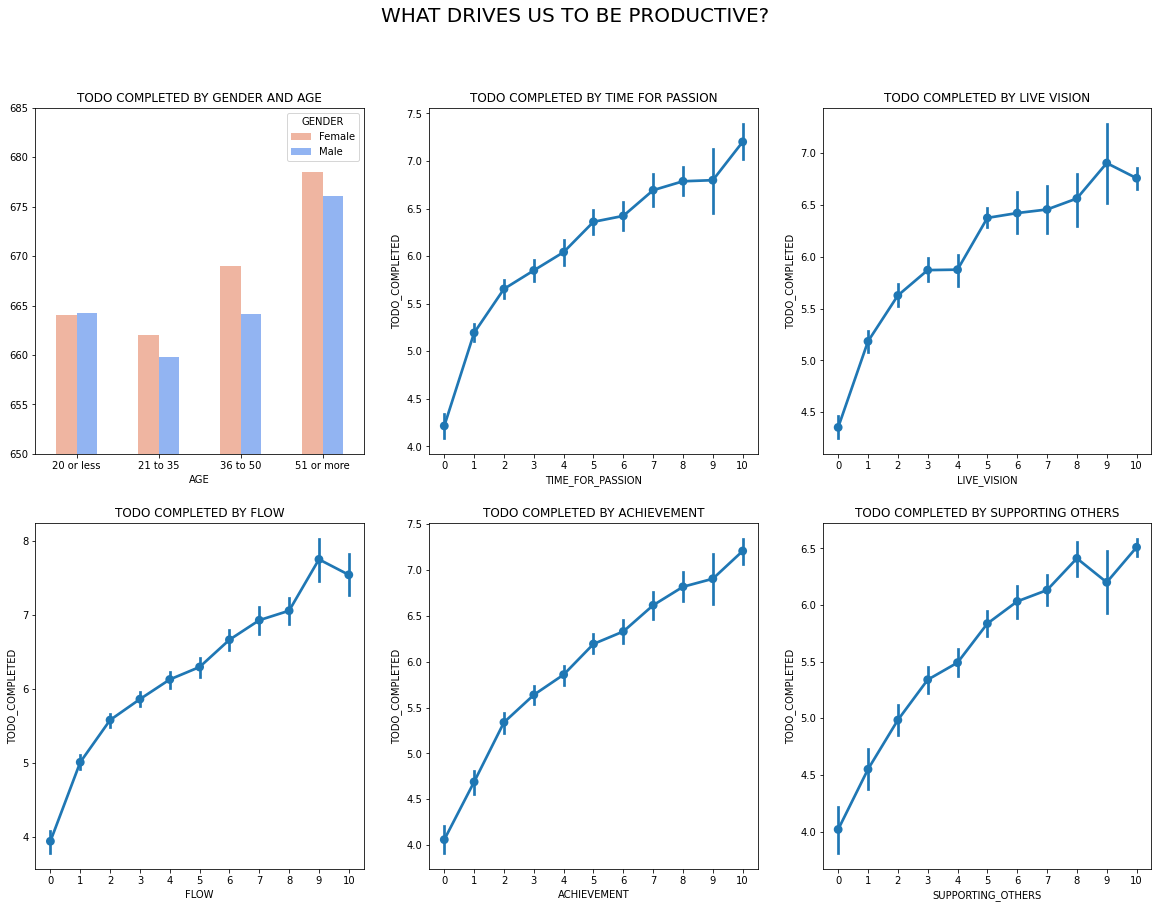

In [27]:
f,ax = plt.subplots(2,3,figsize=(20,14))
f.suptitle('WHAT DRIVES US TO BE PRODUCTIVE?', fontsize=20)

ax[0,0].set_title('TODO COMPLETED BY GENDER AND AGE')
ax[0,1].set_title('TODO COMPLETED BY TIME FOR PASSION')
ax[0,2].set_title('TODO COMPLETED BY LIVE VISION')
ax[1,0].set_title('TODO COMPLETED BY FLOW')
ax[1,1].set_title('TODO COMPLETED BY ACHIEVEMENT')
ax[1,2].set_title('TODO COMPLETED BY SUPPORTING OTHERS')

ax[0,0].set_ylim([650, 685])
df1.plot(kind='bar', color=('darksalmon', 'cornflowerblue'), alpha=0.7, ax = ax[0,0])
ax[0,0].tick_params(axis='x', rotation=0)

sns.pointplot(x= 'TIME_FOR_PASSION',y='TODO_COMPLETED', data=df, ax = ax[0,1])
sns.pointplot(x = 'LIVE_VISION', y = 'TODO_COMPLETED', data = df, ax = ax[0,2])
sns.pointplot(x = 'FLOW',  y = 'TODO_COMPLETED',    data=df, ax = ax[1,0])
sns.pointplot(x = 'ACHIEVEMENT',  y = 'TODO_COMPLETED',    data=df, ax = ax[1,1])
sns.pointplot(x = 'SUPPORTING_OTHERS',  y = 'TODO_COMPLETED',    data=df, ax = ax[1,2])

plt.show()